In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#IMPORTING THE IMDB DATASET
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
train_data[0]
train_labels[0]
max([max(sequence) for sequence in train_data])


17464789/17464789 [==============================] - 0s 0us/step


9999

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
     

1641221/1641221 [==============================] - 0s 0us/step


In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")


Model 1 - Hidden layers = 2 , Nodes = 16

In [5]:

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

COMPILING THE MODEL

In [6]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

TRAINING SET AND VALIDATION SET

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
     

MODEL TRAINING

In [8]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
     

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5364 - accuracy: 0.7726 - val_loss: 0.4130 - val_accuracy: 0.8625
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3395 - accuracy: 0.8901 - val_loss: 0.3242 - val_accuracy: 0.8821
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2523 - accuracy: 0.9203 - val_loss: 0.2895 - val_accuracy: 0.8886
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2052 - accuracy: 0.9323 - val_loss: 0.2764 - val_accuracy: 0.8889
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1713 - accuracy: 0.9449 - val_loss: 0.2780 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1438 - accuracy: 0.9541 - val_loss: 0.2812 - val_accuracy: 0.8852
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1247 - accuracy: 0.9608 - val_loss: 0.3353 - val_accuracy: 0.8732
Epoch 8/20
30

In [9]:

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

PLOT OF THE TRAINING AND VALIDATION LOSS

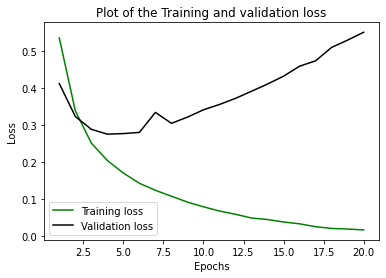

In [10]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "g", label="Training loss")
plt.plot(epochs, val_loss_values, "BLACK", label="Validation loss")
plt.title("Plot of the Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

PLOT OF THE TRAINING AND VALIDATION ACCURACY

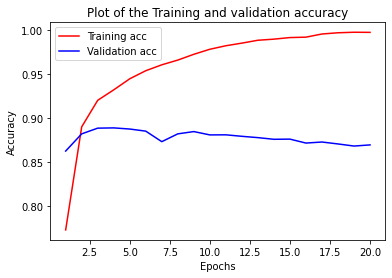

In [11]:

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "r", label="Training acc")
plt.plot(epochs, val_acc, "blue", label="Validation acc")
plt.title("Plot of the Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Realigning a framework from the ground up with epochs=4

In [12]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 16ms/step - loss: 0.5064 - accuracy: 0.8002
Epoch 2/4
49/49 [==============================] - 1s 16ms/step - loss: 0.3092 - accuracy: 0.8999
Epoch 3/4
49/49 [==============================] - 1s 22ms/step - loss: 0.2383 - accuracy: 0.9184
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2809 - accuracy: 0.8882


In [13]:
results=model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.2809 - accuracy: 0.8882


**The 1st model accuracy was 88.21%**

USING A TRAINED DATASET TO GENERATE PREDICTIONS ON NEW DATA

In [14]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.21271773],
       [0.99682546],
       [0.9006525 ],
       ...,
       [0.12697908],
       [0.11010902],
       [0.65141606]], dtype=float32)

MODEL 2- 1 HIDDEN LAYER 64 NODES

In [15]:
model = keras.Sequential([
    layers.Dense(64,activation='tanh',input_shape=(10000,)),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

history2 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=50,
                       batch_size=512,
                       validation_data=(x_val,y_val))

Epoch 1/50
30/30 [==============================] - 2s 54ms/step - loss: 0.1635 - accuracy: 0.7761 - val_loss: 0.1212 - val_accuracy: 0.8450
Epoch 2/50
30/30 [==============================] - 1s 35ms/step - loss: 0.0951 - accuracy: 0.8873 - val_loss: 0.1102 - val_accuracy: 0.8480
Epoch 3/50
30/30 [==============================] - 1s 35ms/step - loss: 0.0762 - accuracy: 0.9079 - val_loss: 0.0876 - val_accuracy: 0.8865
Epoch 4/50
30/30 [==============================] - 1s 34ms/step - loss: 0.0674 - accuracy: 0.9170 - val_loss: 0.0839 - val_accuracy: 0.8887
Epoch 5/50
30/30 [==============================] - 1s 34ms/step - loss: 0.0561 - accuracy: 0.9354 - val_loss: 0.0950 - val_accuracy: 0.8700
Epoch 6/50
30/30 [==============================] - 1s 34ms/step - loss: 0.0533 - accuracy: 0.9366 - val_loss: 0.1040 - val_accuracy: 0.8566
Epoch 7/50
30/30 [==============================] - 1s 35ms/step - loss: 0.0471 - accuracy: 0.9451 - val_loss: 0.0840 - val_accuracy: 0.8838
Epoch 8/50
30

In [16]:
history_dict_2 = history2.history

PLOT OF THE TRAINING AND VALIDATION LOSS

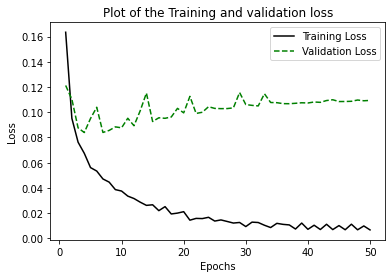

In [17]:
loss = history_dict_2['loss']
val_loss = history_dict_2['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, color= "BLACK", label= "Training Loss")
plt.plot(epochs, val_loss, color= "GREEN",linestyle= "dashed", label= "Validation Loss")
plt.title("Plot of the Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

PLOT OF THE TRAINING AND VALIDATION ACCURACY

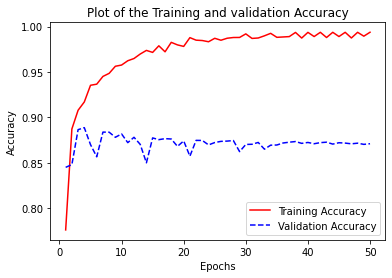

In [18]:
accuracy = history_dict_2['accuracy']
validation_accuracy = history_dict_2['val_accuracy']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs,accuracy,color="red",label="Training Accuracy")
plt.plot(epochs,validation_accuracy, color= "bLue", linestyle="dashed",label="Validation Accuracy")
plt.title("Plot of the Training and validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Realigning a framework from the ground up with epochs=3

In [19]:

model = keras.Sequential([
    layers.Dense(64,activation='tanh',input_shape=(10000,)),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

history_3 = model.fit(x_train,
                       y_train,
                       epochs=3,
                       batch_size=512)  

Epoch 1/3
49/49 [==============================] - 2s 26ms/step - loss: 0.1458 - accuracy: 0.8007
Epoch 2/3
49/49 [==============================] - 1s 26ms/step - loss: 0.0865 - accuracy: 0.8913
Epoch 3/3
49/49 [==============================] - 1s 26ms/step - loss: 0.0722 - accuracy: 0.9074


In [20]:
results2= model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.0842 - accuracy: 0.8871


The 2nd model Accuracy is 88.75%

> Indented block



MODEL 3 - 2 HIDDEN LAYER 64 NODES

In [21]:
Model = keras.Sequential([
    layers.Dense(64,activation='relu',input_shape=(10000,)),
    layers.Dropout(rate=0.5),
    layers.Dense(64,activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history4 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=50,
                       batch_size=256,
                       validation_data=(x_val,y_val))
 

Epoch 1/50
59/59 [==============================] - 2s 31ms/step - loss: 0.2335 - accuracy: 0.9113 - val_loss: 0.2686 - val_accuracy: 0.8939
Epoch 2/50
59/59 [==============================] - 1s 21ms/step - loss: 0.1746 - accuracy: 0.9387 - val_loss: 0.2601 - val_accuracy: 0.8983
Epoch 3/50
59/59 [==============================] - 1s 21ms/step - loss: 0.1417 - accuracy: 0.9488 - val_loss: 0.2590 - val_accuracy: 0.9029
Epoch 4/50
59/59 [==============================] - 1s 21ms/step - loss: 0.1169 - accuracy: 0.9591 - val_loss: 0.3056 - val_accuracy: 0.8901
Epoch 5/50
59/59 [==============================] - 2s 27ms/step - loss: 0.0938 - accuracy: 0.9685 - val_loss: 0.3349 - val_accuracy: 0.8867
Epoch 6/50
59/59 [==============================] - 2s 30ms/step - loss: 0.0809 - accuracy: 0.9723 - val_loss: 0.4457 - val_accuracy: 0.8677
Epoch 7/50
59/59 [==============================] - 1s 21ms/step - loss: 0.0674 - accuracy: 0.9785 - val_loss: 0.3853 - val_accuracy: 0.8856
Epoch 8/50
59

In [22]:

history_dict_4 = history4.history

PLOT OF THE TRAINING AND VALIDATION LOSS

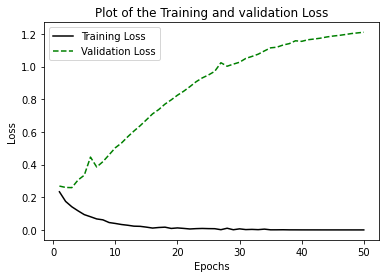

In [23]:
loss = history_dict_4['loss']
val_loss = history_dict_4['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,color='Black',label='Training Loss')
plt.plot(epochs,val_loss,color='green',linestyle='dashed',label='Validation Loss')
plt.title("Plot of the Training and validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plot of the training and validation Accuracy

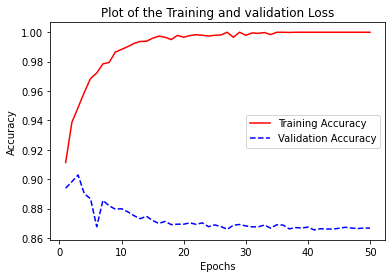

In [24]:

accuracy = history_dict_4['accuracy']
val_accuracy = history_dict_4['val_accuracy']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs,accuracy,color='red',label='Training Accuracy')
plt.plot(epochs,val_accuracy,color='blue',linestyle='dashed',label='Validation Accuracy')
plt.title("Plot of the Training and validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

TRAINING THE MODEL AGAIN WITH 3 EPOCHS

In [25]:
model = keras.Sequential([
    layers.Dense(64,activation='relu',input_shape=(10000,)),
    layers.Dropout(rate=0.5),
    layers.Dense(64,activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history5 = model.fit(x_train,
                       y_train,
                       epochs=3,
                       batch_size=256)

Epoch 1/3
98/98 [==============================] - 2s 17ms/step - loss: 0.4521 - accuracy: 0.7918
Epoch 2/3
98/98 [==============================] - 2s 17ms/step - loss: 0.2649 - accuracy: 0.8994
Epoch 3/3
98/98 [==============================] - 2s 16ms/step - loss: 0.2056 - accuracy: 0.9231


In [26]:

results4 = model.evaluate(x_test,y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.3105 - accuracy: 0.8784


The 3rd model built had an accuaracy on the test set of 88.77

MODEL 4 - HIDDEN LAYERS=1 NODES 32

In [27]:

model = keras.Sequential([
    layers.Dense(32,activation='tanh',input_shape=(10000,)),
    layers.Dropout(rate=0.3),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

history6 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=50,
                       batch_size=512,
                       validation_data=(x_val,y_val))

Epoch 1/50
30/30 [==============================] - 2s 44ms/step - loss: 0.1593 - accuracy: 0.7975 - val_loss: 0.1105 - val_accuracy: 0.8714
Epoch 2/50
30/30 [==============================] - 1s 26ms/step - loss: 0.0832 - accuracy: 0.9079 - val_loss: 0.0913 - val_accuracy: 0.8870
Epoch 3/50
30/30 [==============================] - 1s 25ms/step - loss: 0.0615 - accuracy: 0.9359 - val_loss: 0.0855 - val_accuracy: 0.8900
Epoch 4/50
30/30 [==============================] - 1s 25ms/step - loss: 0.0487 - accuracy: 0.9527 - val_loss: 0.0838 - val_accuracy: 0.8897
Epoch 5/50
30/30 [==============================] - 1s 25ms/step - loss: 0.0400 - accuracy: 0.9638 - val_loss: 0.0837 - val_accuracy: 0.8859
Epoch 6/50
30/30 [==============================] - 1s 25ms/step - loss: 0.0332 - accuracy: 0.9727 - val_loss: 0.0844 - val_accuracy: 0.8841
Epoch 7/50
30/30 [==============================] - 1s 29ms/step - loss: 0.0279 - accuracy: 0.9790 - val_loss: 0.0857 - val_accuracy: 0.8826
Epoch 8/50
30

In [28]:

history_dict_5=history6.history

PLOT OF THE TRAINING AND VALIDATION LOSS

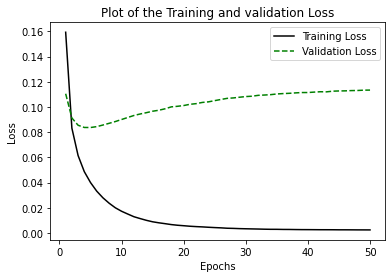

In [29]:
loss = history_dict_5['loss']
val_loss = history_dict_5['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,color='black',label='Training Loss')
plt.plot(epochs,val_loss,color='green',linestyle='dashed',label='Validation Loss')
plt.title("Plot of the Training and validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

PLOT OF THE TRAINING AND VALIDATION ACCURACY

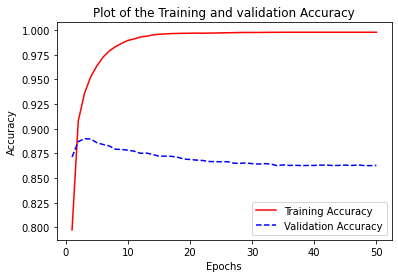

In [30]:
accuracy = history_dict_5['accuracy']
val_accuracy = history_dict_5['val_accuracy']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs,accuracy,color='red',label='Training Accuracy')
plt.plot(epochs,val_accuracy,color='blue',linestyle='dashed',label='Validation Accuracy')
plt.title("Plot of the Training and validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

REALIGNING THE MODEL WITH 3 EPOCHS

In [31]:
model = keras.Sequential([
    layers.Dense(32,activation='tanh',input_shape=(10000,)),
    layers.Dropout(rate=0.3),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

history7 = model.fit(x_train,
                       y_train,
                       epochs=3,
                       batch_size=512)

Epoch 1/3
49/49 [==============================] - 2s 19ms/step - loss: 0.1379 - accuracy: 0.8258
Epoch 2/3
49/49 [==============================] - 1s 19ms/step - loss: 0.0729 - accuracy: 0.9165
Epoch 3/3
49/49 [==============================] - 1s 19ms/step - loss: 0.0562 - accuracy: 0.9373


In [32]:
results5 = model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.0850 - accuracy: 0.8859


THE 4TH MODEL ACCURACY ON THE TEST SET IS 88.53%

**MODEL 5 - HIDDEN LAYERS = 2 NODES 16**

In [33]:

model = keras.Sequential([
    layers.Dense(16,activation='relu',input_shape=(10000,)),
    layers.Dropout(rate=0.5),
    layers.Dense(16,activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history8 = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 5s 87ms/step - loss: 0.6445 - accuracy: 0.6196 - val_loss: 0.5431 - val_accuracy: 0.8451
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5283 - accuracy: 0.7589 - val_loss: 0.4252 - val_accuracy: 0.8690
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.4540 - accuracy: 0.8155 - val_loss: 0.3647 - val_accuracy: 0.8794
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3921 - accuracy: 0.8473 - val_loss: 0.3229 - val_accuracy: 0.8827
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3390 - accuracy: 0.8793 - val_loss: 0.2897 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3029 - accuracy: 0.8959 - val_loss: 0.2778 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2645 - accuracy: 0.9092 - val_loss: 0.2760 - val_accuracy: 0.8882
Epoch 8/20
30

In [34]:

history_dict_6= history8.history

PLOT OF THE TRAINING AND VALIDATION LOSS

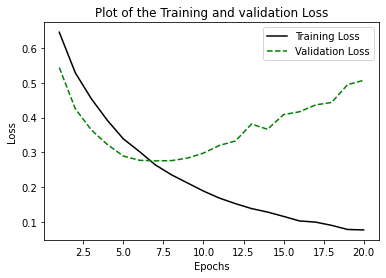

In [35]:
loss=history_dict_6['loss']
val_loss=history_dict_6['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,color='black',label='Training Loss')
plt.plot(epochs,val_loss,color='green',linestyle='dashed',label='Validation Loss')
plt.title("Plot of the Training and validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
     

PLOT OF THE TRAINING AND VALIDATION ACCURACY

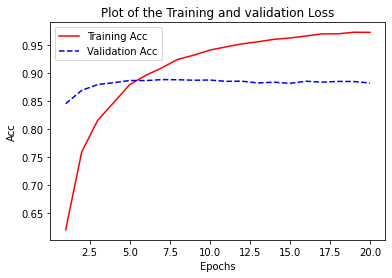

In [36]:

accuracy=history_dict_6['accuracy']
val_accuracy=history_dict_6['val_accuracy']
epochs=range(1,len(accuracy)+1)
plt.plot(epochs,accuracy,color='red',label='Training Acc')
plt.plot(epochs,val_accuracy,color='blue',linestyle='dashed',label='Validation Acc')
plt.title("Plot of the Training and validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

REALIGNING THE MODEL WITH 7 EPOCHS

In [37]:

model = keras.Sequential([
    layers.Dense(16,activation='relu',input_shape=(10000,)),
    layers.Dropout(rate=0.5),
    layers.Dense(16,activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history9 = model.fit(x_train,
                        y_train,
                        epochs=7,
                        batch_size=512)

Epoch 1/7
49/49 [==============================] - 2s 18ms/step - loss: 0.5957 - accuracy: 0.6842
Epoch 2/7
49/49 [==============================] - 1s 16ms/step - loss: 0.4487 - accuracy: 0.8207
Epoch 3/7
49/49 [==============================] - 1s 16ms/step - loss: 0.3633 - accuracy: 0.8663
Epoch 4/7
49/49 [==============================] - 1s 16ms/step - loss: 0.3107 - accuracy: 0.8908
Epoch 5/7
49/49 [==============================] - 1s 16ms/step - loss: 0.2680 - accuracy: 0.9096
Epoch 6/7
49/49 [==============================] - 1s 16ms/step - loss: 0.2387 - accuracy: 0.9195
Epoch 7/7
49/49 [==============================] - 1s 16ms/step - loss: 0.2111 - accuracy: 0.9292


In [38]:
results6= model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.2899 - accuracy: 0.8863


THE 5TH MODEL ACCURACY IS 88.62%

MODEL 6 HIDDEN LAYER = 2 NODES 16

In [39]:
model = keras.Sequential([
    layers.Dense(16,activation='relu',input_shape=(10000,)),
    layers.Dropout(rate=0.4),
    layers.Dense(16,activation='relu'),
    layers.Dropout(rate=0.4),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history10 = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.6144 - accuracy: 0.6629 - val_loss: 0.4713 - val_accuracy: 0.8509
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4675 - accuracy: 0.7990 - val_loss: 0.3625 - val_accuracy: 0.8753
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3814 - accuracy: 0.8538 - val_loss: 0.3087 - val_accuracy: 0.8862
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3176 - accuracy: 0.8835 - val_loss: 0.2836 - val_accuracy: 0.8905
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2708 - accuracy: 0.9049 - val_loss: 0.2733 - val_accuracy: 0.8913
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2292 - accuracy: 0.9229 - val_loss: 0.2726 - val_accuracy: 0.8917
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2064 - accuracy: 0.9331 - val_loss: 0.2825 - val_accuracy: 0.8877
Epoch 8/20
30

In [40]:
history_dict_7= history10.history

PLOT OF THE TRAINING AND VALIDATION LOSS

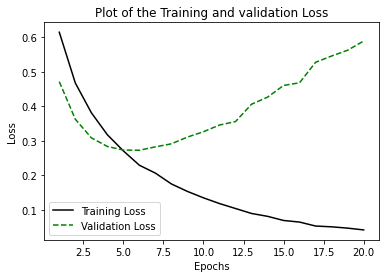

In [41]:

loss=history_dict_7['loss']
val_loss=history_dict_7['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,color='black',label='Training Loss')
plt.plot(epochs,val_loss,color='green',linestyle='dashed',label='Validation Loss')
plt.title("Plot of the Training and validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
     

PLOT OF THE TRAINING AND VALIDATION ACCURACY

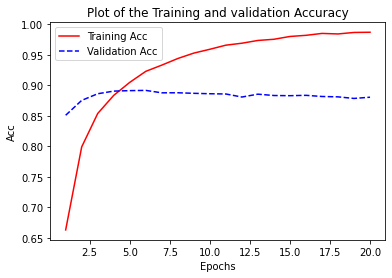

In [42]:
accuracy=history_dict_7['accuracy']
val_accuracy=history_dict_7['val_accuracy']
epochs=range(1,len(accuracy)+1)
plt.plot(epochs,accuracy,color='red',label='Training Acc')
plt.plot(epochs,val_accuracy,color='blue',linestyle='dashed',label='Validation Acc')
plt.title("Plot of the Training and validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

REALIGNING THE MODEL WITH 4 EPOCHS

In [43]:
model = keras.Sequential([
    layers.Dense(16,activation='relu',input_shape=(10000,)),
    layers.Dropout(rate=0.4),
    layers.Dense(16,activation='relu'),
    layers.Dropout(rate=0.4),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history11 = model.fit(x_train,
                        y_train,
                        epochs=4,
                        batch_size=512)

Epoch 1/4
49/49 [==============================] - 2s 16ms/step - loss: 0.5559 - accuracy: 0.7258
Epoch 2/4
49/49 [==============================] - 1s 17ms/step - loss: 0.3912 - accuracy: 0.8507
Epoch 3/4
49/49 [==============================] - 1s 20ms/step - loss: 0.3148 - accuracy: 0.8855
Epoch 4/4
49/49 [==============================] - 1s 20ms/step - loss: 0.2580 - accuracy: 0.9102


In [44]:
results7= model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.2734 - accuracy: 0.8888


THE 6TH MODEL ACCURACY IS 88.72%

EVALUATING THE 6 MODELS TRAINED ON THE IMDB DATA


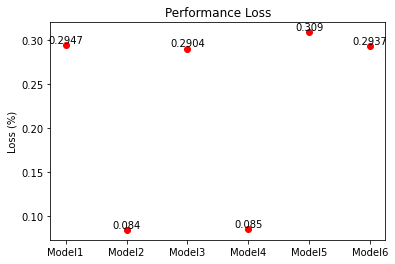

In [45]:
loss_dict = {'Model1': 0.2947, 'Model2': 0.0840, 'Model3': 0.2904, 'Model4': 0.0850,
             'Model5': 0.3090, 'Model6': 0.2937}

# Get model names and loss values as separate lists
models = list(loss_dict.keys())
losses = list(loss_dict.values())

# Plot the scatter plot with labels
plt.scatter(models, losses, color='red')
plt.title('Performance Loss')
plt.ylabel('Loss (%)')

for (xi, yi) in zip(models, losses):
    plt.text(xi, yi, str(yi), va='bottom', ha='center')

plt.show()

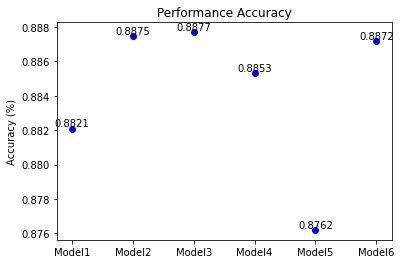

In [46]:
import matplotlib.pyplot as plt

# Create a dictionary with model names as keys and accuracy values as values
acc_dict = {'Model1': 0.8821, 'Model2': 0.8875, 'Model3': 0.8877, 'Model4': 0.8853,
            'Model5': 0.8762, 'Model6': 0.8872}

# Get model names and accuracy values as separate lists
models = list(acc_dict.keys())
accuracy = list(acc_dict.values())

# Plot the scatter plot with labels
plt.scatter(models, accuracy, color='blue')
plt.title('Performance Accuracy')
plt.ylabel('Accuracy (%)')

for (xi, yi) in zip(models, accuracy):
  plt.text(xi, yi, str(yi), va='bottom', ha='center')

plt.show()